# Feature Engineered Regression
This notebook will be feature engineered Regression Model. This will be a building block to moving to a Neural Network for ROI predictions

This is Regression #3 in our 5 part regression series



### Import All Requirements

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import seaborn as sns

### 1. Read the CSV file into a pandas dataframe

In [38]:
df = pd.read_csv("../data/fixed_target_encoding/Encoded_Data.csv")
df.dropna(inplace=True)


# Uncomment the following lines to checkout the first few rows of the DataFrame and learn more about its structure
print(df.head())
print(df.columns)

    tmdb_id  adult  belongs_to_collection  collection_id   budget  \
4       618  False                   True       982426.0   100000   
48    65203  False                   True      1037405.0   379000   
52      143  False                   True      1070848.0  1448864   
54   156320  False                   True       981517.0   337000   
59      138  False                   True       221539.0   355000   

                                             overview  production_company_id  \
4   Two families, abolitionist Northerners the Sto...               161894.0   
48  The vaudeville act of Harriet and Queenie Maho...                   21.0   
52  When a group of idealistic young men join the ...                   33.0   
54  Three department store girls--Connie, Franky, ...                   21.0   
59  British estate agent Renfield travels to Trans...                   33.0   

   production_company_name  release_month  release_year  ...  Action  \
4           Epoch Film Co.      

In [39]:
print(df.columns)

Index(['tmdb_id', 'adult', 'belongs_to_collection', 'collection_id', 'budget',
       'overview', 'production_company_id', 'production_company_name',
       'release_month', 'release_year', 'revenue', 'tagline', 'director',
       'actor_0_name', 'actor_0_id', 'actor_0_gender', 'actor_1_name',
       'actor_1_id', 'actor_1_gender', 'actor_2_name', 'actor_2_id',
       'actor_2_gender', 'actor_3_name', 'actor_3_id', 'actor_3_gender',
       'actor_4_name', 'actor_4_id', 'actor_4_gender', 'actor_birthdays',
       'Gender Ratio', 'Average Actor Age', 'runtime', 'Crime', 'Drama', 'War',
       'Western', 'Family', 'Thriller', 'Fantasy', 'Mystery', 'Animation',
       'Music', 'Romance', 'Adventure', 'History', 'Science Fiction', 'Comedy',
       'TV Movie', 'Documentary', 'Horror', 'Action', 'actor0_rev',
       'actor0_movies', 'actor1_rev', 'actor1_movies', 'actor2_rev',
       'actor2_movies', 'actor_0_name_encoded', 'actor_1_name_encoded',
       'actor_2_name_encoded'],
      dtype='

In [40]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    # Extract the release month from the 'release_month' column
    release_month = row['release_month']
    
    # Create a new column for each month and set it to 1 if the release month matches, 0 otherwise
    for month in months:
        df.at[index, month] = 1 if release_month == months.index(month) + 1 else 0

print(df)

normalize_features = ['budget', 'revenue', 'actor_0_name_encoded', 'actor_1_name_encoded', 'actor_2_name_encoded']
scaler = StandardScaler()
df[normalize_features] = scaler.fit_transform(df[normalize_features]) #scale budget and revenue




      tmdb_id  adult  belongs_to_collection  collection_id     budget  \
4         618  False                   True       982426.0     100000   
48      65203  False                   True      1037405.0     379000   
52        143  False                   True      1070848.0    1448864   
54     156320  False                   True       981517.0     337000   
59        138  False                   True       221539.0     355000   
...       ...    ...                    ...            ...        ...   
8733   770906  False                   True      1213248.0   34000000   
8735   845111  False                   True       913258.0   39000000   
8736   660360  False                   True       660359.0   40000000   
8751   779816  False                   True       991356.0   30000000   
8752   693134  False                   True       726871.0  190000000   

                                               overview  \
4     Two families, abolitionist Northerners the Sto...   
48   

### 2. Setup the Dataset

In [41]:
print(df.columns)

Index(['tmdb_id', 'adult', 'belongs_to_collection', 'collection_id', 'budget',
       'overview', 'production_company_id', 'production_company_name',
       'release_month', 'release_year', 'revenue', 'tagline', 'director',
       'actor_0_name', 'actor_0_id', 'actor_0_gender', 'actor_1_name',
       'actor_1_id', 'actor_1_gender', 'actor_2_name', 'actor_2_id',
       'actor_2_gender', 'actor_3_name', 'actor_3_id', 'actor_3_gender',
       'actor_4_name', 'actor_4_id', 'actor_4_gender', 'actor_birthdays',
       'Gender Ratio', 'Average Actor Age', 'runtime', 'Crime', 'Drama', 'War',
       'Western', 'Family', 'Thriller', 'Fantasy', 'Mystery', 'Animation',
       'Music', 'Romance', 'Adventure', 'History', 'Science Fiction', 'Comedy',
       'TV Movie', 'Documentary', 'Horror', 'Action', 'actor0_rev',
       'actor0_movies', 'actor1_rev', 'actor1_movies', 'actor2_rev',
       'actor2_movies', 'actor_0_name_encoded', 'actor_1_name_encoded',
       'actor_2_name_encoded', 'January', 'Fe

In [42]:
# Select the features (X) and the target variable (y)
features = ['belongs_to_collection', 'budget', 'release_year', 'Gender Ratio', 'Average Actor Age', 'Crime', 'Drama', 'War',
       'Western', 'Family', 'Thriller', 'Fantasy', 'Mystery', 'Animation',
       'Music', 'Romance', 'Adventure', 'History', 'Science Fiction', 'Comedy',
       'TV Movie', 'Documentary', 'Horror', 'Action', 'January', 'February', 'March', 'April', 'May',
       'June', 'July', 'August', 'September', 'October', 'November',
       'December']

# features += ['actor_0_name_encoded','actor_1_name_encoded', 'actor_2_name_encoded']
# features += ['runtime']

# Define bin edges
bin_edges = pd.cut(df['runtime'], bins=5, retbins=True)[1]

# Split 'runtime' into 10 bins and add as one-hot encoded columns
df['runtime_bins'] = pd.cut(df['runtime'], bins=bin_edges, labels=False)
runtime_bins_one_hot = pd.get_dummies(df['runtime_bins'], prefix='runtime_bin')

# Add the minimum and maximum values of each bin to the column names
bin_labels = [f"{int(bin_edges[i])}-{int(bin_edges[i+1])}" for i in range(len(bin_edges)-1)]
runtime_bins_one_hot.columns = ['runtime_bin_' + label for label in bin_labels]

# Add the one-hot encoded columns to the DataFrame
df = pd.concat([df, runtime_bins_one_hot], axis=1)

# Update the features list with the new bin columns
features += list(runtime_bins_one_hot.columns)


correlation_features = ['budget', 'release_month', 'release_year', 'Gender Ratio', 'Average Actor Age', 'runtime']


X = df[features]  # Assuming 'budget' is the independent variable
y = df['revenue']   # Assuming 'revenue' is the dependent variable


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


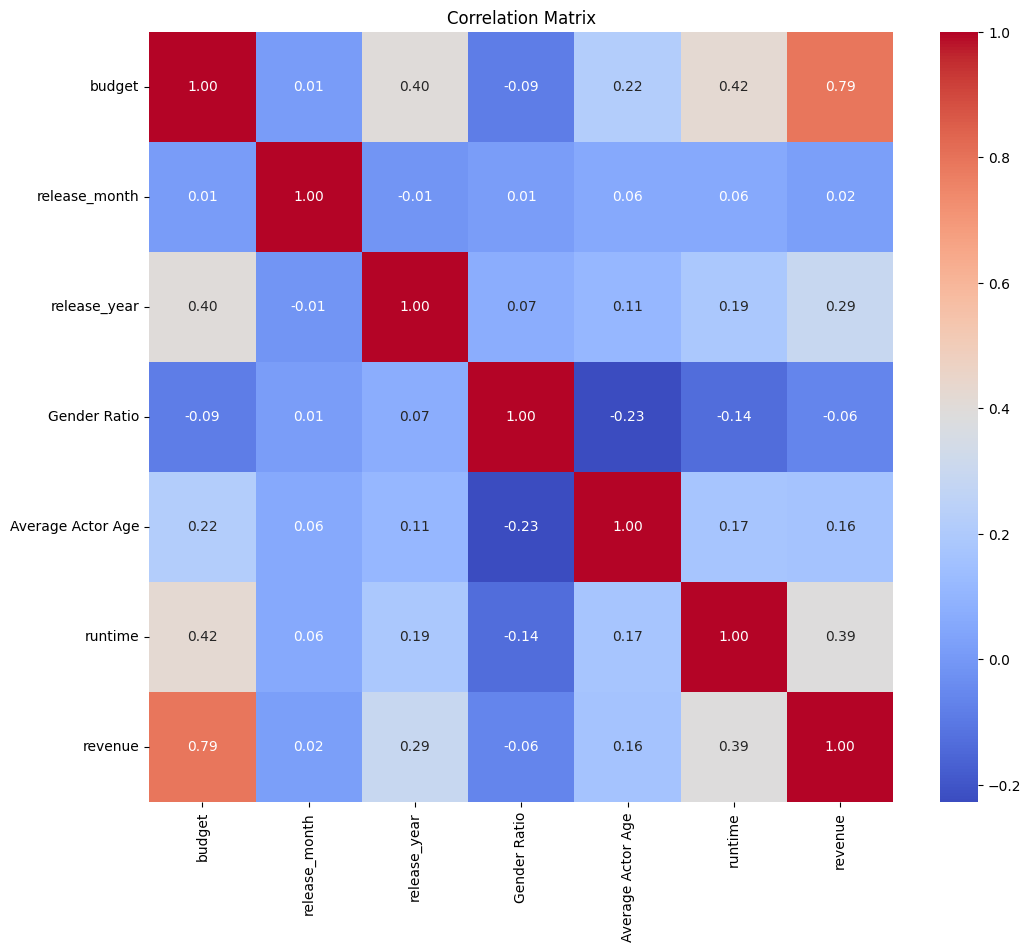

In [43]:
correlation_matrix = df[correlation_features + ['revenue']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### 3. Create and Fit the Model

In [44]:
# Create and fit the model
model = LinearRegression()
# model = Lasso(alpha = 0.1)
model.fit(X_train, y_train)

LinearRegression()

### 4. Make Predictions

In [45]:
# Make predictions
y_pred = model.predict(X_test)

### 6. Some Results

In [46]:
# Print the coefficients
feature_names = X_train.columns

# Print each feature and its corresponding weight
for feature, weight in zip(feature_names, model.coef_):
    print(f"{feature}: {weight}")

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print('R-squared (R2) Score:', r2)

belongs_to_collection: -5.395120511331567e-16
budget: 0.7038761832851909
release_year: -0.00029372907145627824
Gender Ratio: -0.05386836675073786
Average Actor Age: -0.00011855993334757547
Crime: -0.07615995476973321
Drama: -0.033694459189575414
War: -0.13322290270583573
Western: -0.3207837250248643
Family: -0.09231469743248041
Thriller: -0.0470170543192552
Fantasy: -0.05224921513315796
Mystery: -0.06085675530086689
Animation: 0.28047296859728826
Music: -0.06347701201867355
Romance: 0.09934157182781729
Adventure: 0.13792877798807565
History: -0.3813623420742333
Science Fiction: -0.04686025282607294
Comedy: -0.055651388931961705
TV Movie: 2.220446049250313e-16
Documentary: -1.1102230246251565e-16
Horror: -0.009595133746296646
Action: -0.11801114697558675
January: -0.04615683948659049
February: -0.016999886470931463
March: -0.04705746746112449
April: 0.07193826139348554
May: 0.07560885736286752
June: 0.09737364690811387
July: -0.04023147384095877
August: -0.0904497163639092
September: -0